In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Read in the file
file = Path("../Data/us_videos_cleaned.csv")
us_videos_df = pd.read_csv(file)
us_videos_df.head()

,video_id,publish_date,publish_time,trending_date,diff_days,title,channel_title,category_id,category_type,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,9wRQljFNDW8,2017-11-13,02:05:26,2017-11-14,1,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,False,False,False
1,Om_zGhJLZ5U,2017-11-12,18:00:03,2017-11-14,2,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,False,False,False
2,goP4Z5wyOlM,2017-11-12,21:16:40,2017-11-14,2,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,False,False,False
3,8NHA23f7LvU,2017-11-10,19:06:23,2017-11-14,4,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,False,False,False
4,IE-xepGLVt8,2017-11-10,12:04:17,2017-11-14,4,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,False,False,False


In [3]:
# instantiate model
model = LinearRegression()

In [4]:
# Select features and target
X = us_videos_df.likes.values.reshape(-1,1)
y = us_videos_df['views']

In [5]:
# fit the model
model.fit(X, y)

LinearRegression()

In [6]:
# make prediction
y_pred = model.predict(X)
print(y_pred)

[  292507.71617148   501056.69967405   281958.66409052 ...
  1733897.3597294   6138628.2155171  11128056.24327346]


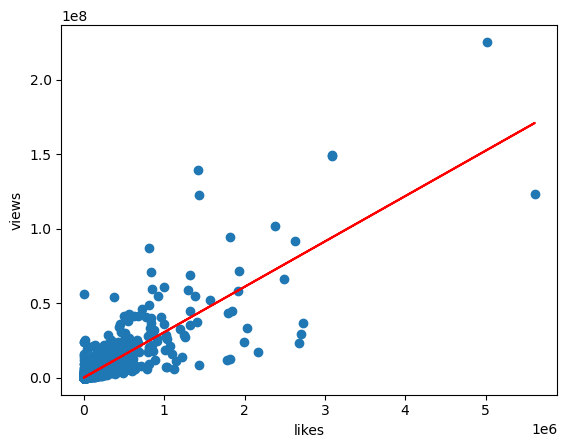

In [7]:
# plot the result
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("likes")
plt.ylabel("views")
plt.show()

In [8]:
print(model.coef_)
print(model.intercept_)

[30.40072646]
272595.2403414254


<AxesSubplot:>

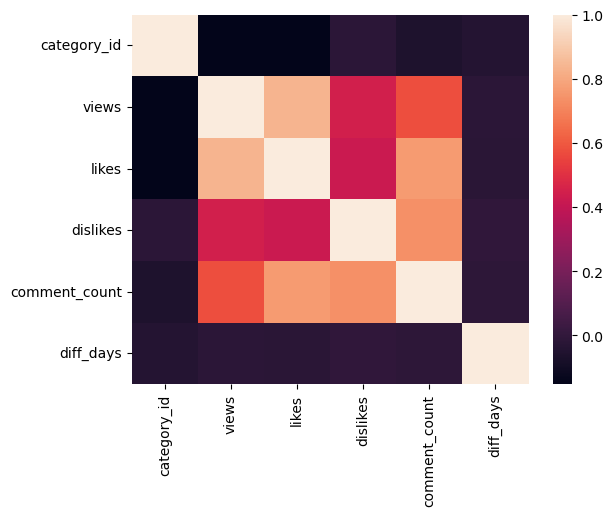

In [17]:
# Create a dataframe contains views, likes, dislikes, comment_counts, and category_id
seaborn_df = us_videos_df[['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'diff_days']]

sns.heatmap(seaborn_df.corr())

<AxesSubplot:xlabel='diff_days', ylabel='views'>

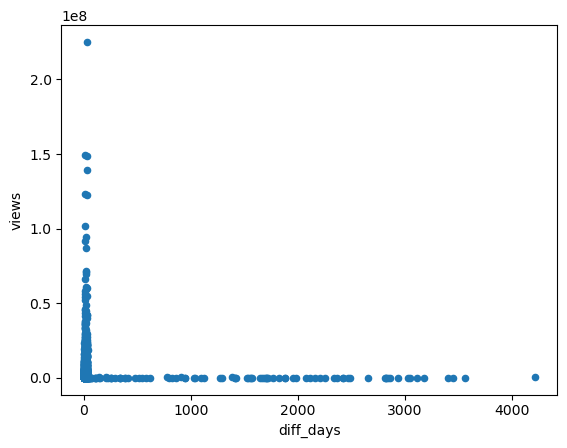

In [22]:
us_videos_df.plot(x="diff_days", y="views", kind="scatter")